In [2]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 52 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


# Тема № 19. Методы ближайших соседей

Ранее мы говорили про обучение различных моделей, подразумевая под обучение настройку параметров этих моделей, но так ли необходимо делать модели через обучение? Может ли модель получиться без обучения? Ответ - да. Модели могут создаваться и работать вовсе без обучения.

Одна из таких моделей это модель на основе метода **К-ближайших соседей** (K-Nearest Neighbors). Идея очень проста, если у нас есть какие-то обучающие примеры, то давайте использовать сами эти примеры для решения, а не обучать параметры модели. Например для классификации давайте для заданного примера найдем несколько, К штук, *ближайших* к нему примеров из обучающего набора данных и посмотрим какие у них классы, выберем такой класс, для которого примеров больше всего. На рисунке для центральной точки (черная) проверяем расстояние от нее до всех точек из обучающего набора и ищем 5 ближайших соседних точек, проверяем сколько из них оказались зелеными, их больше, по этому приписываем нашей точке зеленый класс.

![img](https://drive.google.com/uc?id=1NxtRFzELRBjixKvUGrtWiMvYbZWWqQU8)

Для регрессии можно поступить аналогично, но в качестве решения брать, скажем, среднее значение результатов ближайших точек.

Метод довольно прост, но у него есть существенные недостатки:
* нужно хранить и обрабатывать все обучающие примеры! Если их много то это становится не эффективно.
* чтобы найти ближайших соседей нужно посчитать расстояния до всех  примеров и сравнить их, когда примеров много это тоже не эффективно.

Для борьбы с этим метод усложняют, придумывают специальные структуры для хранения примеров, в которых проще и быстрее искать соседей. Обычно это специальные деревья решений, которые разбивают пространство на множество частей, в которых будут искать соседей.

Метод часто используется как вспомогательный для других методов. 

Можно придумать разные модификации его, например считать не Евклидово расстояние, к которому мы привыкли, а другие типы расстояний.

Еще вариант - вместо того, чтобы искать заданное число ближайших соседей, ищут всех соседей в пределах заданного расстояния от текущего примера.   

В `sklearn` методы ближайших соседей реализованы в модуле  
 [`neighbors`](https://scikit-learn.org/stable/modules/neighbors.html#).
   
[`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) - реализация классификатора

[`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) - реализация регрессора


Важные аргументы
* `n_neighbors` - число ближайших соседей.
* `algorithm` - алгоритм, используемый для поиска ближайших соседей: ‘brute’ - полный перебор , ‘ball_tree’ и  ‘kd_tree’ - на основе деревьев, ‘auto’ - по умолчанию, автоматический выбор. 
* `metric` - название или функция для расчета расстояний, по умолчанию Евклидово 
* `p` - параметр определяющий тип расстояния, по умолчанию 2 - Евклидово. В общем случае расстояние [Минковского](https://ru.wikipedia.org/wiki/Расстояние_Минковского)

Важные атрибуты 
* `classes_` - метки классов для классификатора 

Методы те же самые как и в других классификаторах этой библиотеки `fit()`, `predict()`, `score()` ,..., но есть еще `kneighbors()` который возвращает К ближайших соседей к заданной точке и `kneighbors_graph()` который рассчитывает граф ближайших соседей для заданной точки.

Пример использования ниже.

In [1]:
X = [[0], [1], [2], [3]] # примеры входов
y = [0, 0, 1, 1] # примеры классов
from sklearn.neighbors import KNeighborsClassifier # подключаем классификатор
neigh = KNeighborsClassifier(n_neighbors=3) # создаем его, 3 ближайших соседа
neigh.fit(X, y) # обучаем

print(neigh.predict([[1.1]])) # тестируем для другой точки

print(neigh.predict_proba([[0.9]])) # смотрим на уровни уверенности классов

[0]
[[0.66666667 0.33333333]]


Интересно посмотреть на разделяющую поверхность такого классификатора. Попробуйте использовать другой алгоритм или другое число ближайших соседей. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



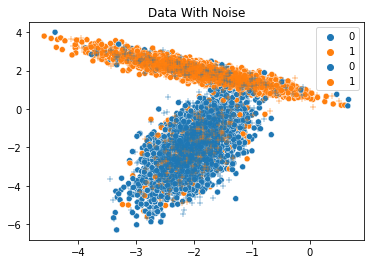

Score= 0.8703030303030304


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



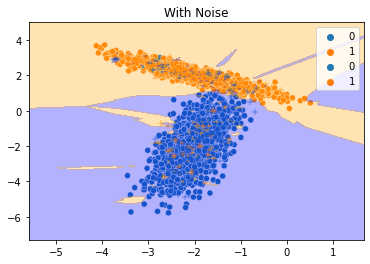

In [3]:


# функция  для рисования разделяющей поверхности на плоскости
from ML_School.utils import Div_plate
# Div_plate(clf,flip_level) принимает объект-классификатор и уровень шума (ошибок)
# создает двумерные данные, обучает классификатор, рисует разделяющую поверхность 
from sklearn.neighbors import KNeighborsClassifier # подключаем классификатор
clf = KNeighborsClassifier(n_neighbors=3) # создаем его, 3 ближайших соседа
flip_level=0.2
Div_plate(clf,flip_level)

Для примера посмотрим на использование такого метода для дорисовки лица, если часть его закрыта, сравним с линейными моделями. Будем на основе верхней половины изображения лица восстанавливать нижнюю, это задача регрессии.

Результат на картинке ниже, не идеал, но хоть что-то.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


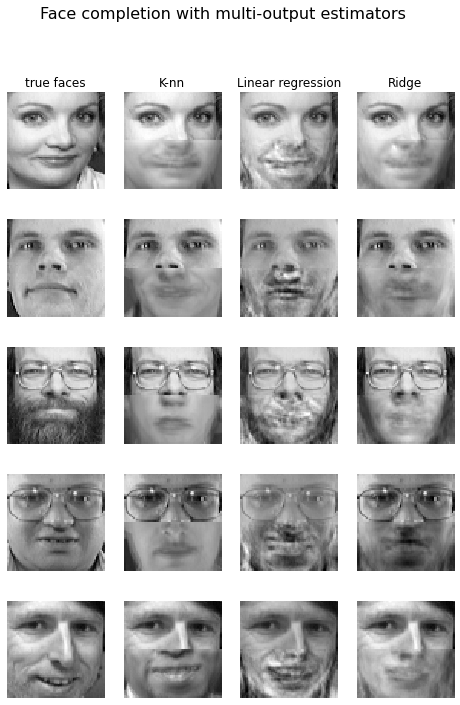

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces # набор данных с изображениями лиц
from sklearn.utils.validation import check_random_state #

from sklearn.neighbors import KNeighborsRegressor # KNN 
from sklearn.linear_model import LinearRegression # линейный
from sklearn.linear_model import RidgeCV # линейный

# загружаем данные
data, targets = fetch_olivetti_faces(return_X_y=True)
#  разделяем на обучающие и тестовые
train = data[targets < 30]
test = data[targets >= 30]  # разделение по людям

# Тестировать будем на меньшем наборе (для скорости)
n_faces = 5 # 5 тестовых людей
rng = check_random_state(4) #
face_ids = rng.randint(test.shape[0], size=(n_faces, )) # случайные индексы
test = test[face_ids, :] # выбираем случайно 5 людей

n_pixels = data.shape[1] #
# Верхняя половина изображений лиц - входы
X_train = train[:, :(n_pixels + 1) // 2] #
# Нижняя пловина изображений лиц - указания учителя
y_train = train[:, n_pixels // 2:] #
X_test = test[:, :(n_pixels + 1) // 2] # аналогично для теста
y_test = test[:, n_pixels // 2:] # аналогично для теста

# Создаем модели
ESTIMATORS = {
    "K-nn": KNeighborsRegressor(), # KNN
    "Linear regression": LinearRegression(), # линейная регрессия
    "Ridge": RidgeCV(), # линейный регрессор
}

y_test_predict = dict() #
for name, estimator in ESTIMATORS.items(): #
    estimator.fit(X_train, y_train) # обучаем модели
    y_test_predict[name] = estimator.predict(X_test) # тестируем модели

# Рисуем результаты
image_shape = (64, 64) # размер изображений

n_cols = 1 + len(ESTIMATORS) # число столбцов в графиках (один для истинных лиц)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces)) # размер полотна
#
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces): #
    true_face = np.hstack((X_test[i], y_test[i])) # объединяем в изображение верхнюю и нижнюю половину истинного лица

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1) # подграфик
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, # первый (i=0) для истинных лиц
                          title="true faces")

    sub.axis("off") #
    sub.imshow(true_face.reshape(image_shape), # рисуем истинное изображение лица
               cmap=plt.cm.gray, #
               interpolation="nearest") #

    for j, est in enumerate(sorted(ESTIMATORS)): #
        # объединяем в изображение верхнюю и посчитанную нижнюю половину лица
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i: #
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else: #
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off") #
        sub.imshow(completed_face.reshape(image_shape), # рисуем полученное изображение
                   cmap=plt.cm.gray, #
                   interpolation="nearest") #

plt.show() #

Реализованы еще варианты метода ближайших соседей, где задается не число ближайших соседей, а радиус, в пределах которого ищутся ближайшие соседи, сколько бы их там не оказалось.

- [RadiusNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)

В отличии от предыдущих, вместо числа соседей указываем аргумент `radius` - радиус для поиска ближайших соседей.

Можно указать аргумент `outlier_label` который говорит, что делать если в заданном радиусе не окажется соседей вообще, по умолчанию или None - выдаст ошибку, ‘most_frequent’ - наиболее встречаемый класс, или указать свою строку. 

Построим разделяющую поверхность для такого классификатора. По-изменяйте радиус, посмотрите как это влияет на работу классификатора.  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



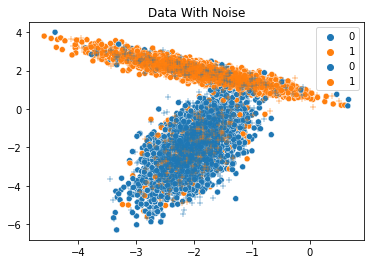

Score= 0.8824242424242424


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



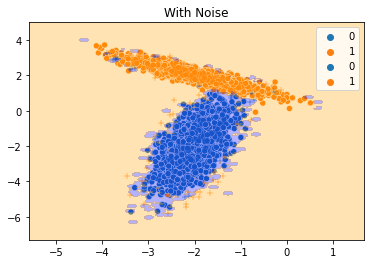

In [5]:
from sklearn.neighbors import RadiusNeighborsClassifier # подключаем классификатор
clf = RadiusNeighborsClassifier(radius=0.1, outlier_label = 'most_frequent') # создаем его, 3 ближайших соседа
flip_level=0.2
Div_plate(clf,flip_level)


Поэкспериментируйте самостоятельно с другими параметрами,  посмотрите на результат.